In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# EDA

In [3]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [5]:
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

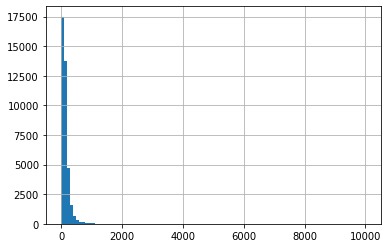

In [7]:
train['price'].hist(bins=100)

# 데이터 전처리

In [8]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

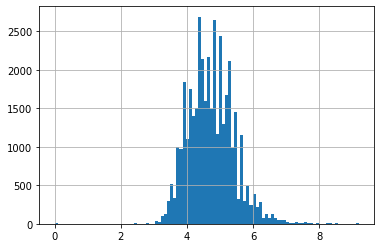

In [9]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [10]:
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis = 1)

In [11]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [12]:
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [13]:
target = train['price']
train = train.drop('price', axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
]

train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.fit_transform(test[cols])

display(train.head(1))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,0.343458,Gilles,Manhattan,Harlem,0.731742,0.539318,Private room,0.001601,0.004769,0.001538,0.003067,0.0


In [16]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

In [18]:
train.describe()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,0.246935,0.555225,0.550016,0.004796,0.037000,0.018666,0.018683,0.309537
std,0.287307,0.132102,0.087225,0.016261,0.070889,0.027364,0.100188,0.360752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028553,0.461150,0.491561,0.000000,0.001590,0.000684,0.000000,0.000000
50%,0.111939,0.541050,0.543214,0.000801,0.007949,0.006325,0.000000,0.123288
75%,0.391632,0.637868,0.579724,0.003203,0.036566,0.027179,0.003067,0.624658
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['neighbourhood_group',
       'neighbourhood',
       'room_type']

display(train.head(1))
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Room in South Harlem near Central Park,0.343458,Gilles,Manhattan,Harlem,0.731742,0.539318,Private room,0.001601,0.004769,0.001538,0.003067,0.0


In [22]:
display(train.head(1))

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Room in South Harlem near Central Park,0.343458,Gilles,2,94,0.731742,0.539318,1,0.001601,0.004769,0.001538,0.003067,0.0


In [23]:
del_cols = ['name', 'host_name']
train = train.drop(del_cols, axis = 1)
test = test.drop(del_cols, axis = 1)

In [24]:
train

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.343458,2,94,0.731742,0.539318,1,0.001601,0.004769,0.001538,0.003067,0.000000
1,0.178671,2,95,0.631633,0.478445,0,0.000801,0.101749,0.028718,0.003067,0.717808
2,0.001595,2,209,0.558041,0.449354,0,0.047238,0.001590,0.003419,0.000000,0.000000
3,0.013033,1,13,0.464162,0.579361,0,0.002402,0.379968,0.049402,0.003067,0.002740
4,0.045468,1,13,0.458611,0.543571,1,0.021617,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
39111,0.392690,2,73,0.510387,0.446117,0,0.023219,0.000000,0.000000,0.003067,0.947945
39112,0.816001,3,183,0.390813,0.892065,1,0.000000,0.090620,0.124444,0.006135,0.936986
39113,0.090007,2,201,0.671773,0.562972,0,0.004804,0.000000,0.000000,0.000000,0.000000
39114,0.009504,2,92,0.560684,0.461566,0,0.023219,0.030207,0.003932,0.000000,0.709589


In [30]:
target

0        4.262680
1        5.484797
2        5.017280
3        4.454347
4        3.806662
           ...   
39111    5.225747
39112    3.931826
39113    4.795791
39114    5.111988
39115    5.303305
Name: price, Length: 39116, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.exp(pred)

mean_squared_error(y_val, pred)

17822.26338711236

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.exp(pred)

mean_squared_error(y_val, pred)

17806.23813383971

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.exp(pred)

mean_squared_error(y_val, pred)

12071.738012794958

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.exp(pred)

mean_squared_error(y_val, pred)

12104.161694678913

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state = 200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.exp(pred)
mean_squared_error(y_val, pred)

23619.77606304758

In [63]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.exp(pred)

mean_squared_error(y_val, pred)

23751.600633253536

In [64]:
#XGB Booster
import pandas as pd
from sklearn.metrics import mean_squared_error

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
pred = np.exp(pred)

mse = mean_squared_error(y_test, pred)

print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 44847.8612
